### Importação de Bibliotecas

- `pandas`: Biblioteca para manipulação eficiente de dados tabulares. Fornece estruturas de dados como `DataFrame` para facilitar o tratamento de informações estruturadas.
- `matplotlib.pyplot`: Utilizada para visualização de dados. Permite a criação de gráficos diversos, incluindo linhas, barras e histogramas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Leitura e Definição das Colunas do Dataset  

O código abaixo **carrega o arquivo `googleplaystore.csv` e define os nomes das colunas** para padronizar a estrutura do `DataFrame`.  

- **Utiliza `pd.read_csv()`** para ler o arquivo CSV, garantindo que todos os dados sejam tratados como string (`dtype=str`).  
- **Define `sep=","` e `quotechar='"'`** para garantir que os campos sejam separados corretamente, mesmo se houver aspas dentro dos valores.  
- **`engine="python"` é usado para compatibilidade** com diferentes formatos de arquivos CSV.  
- **`on_bad_lines="skip"`** ignora linhas mal formatadas para evitar falhas na leitura.  
- **`header=None`** impede que a primeira linha seja interpretada como cabeçalho, garantindo que todas as linhas sejam lidas como dados.  
- **Define manualmente os nomes das colunas (`df.columns = [...]`)** para garantir a correta identificação dos campos no `DataFrame`. 

In [2]:
file_path = "../googleplaystore.csv"
df = pd.read_csv(file_path, sep=",", quotechar='"', dtype=str, engine="python", on_bad_lines="skip", header=None)

# Definição das colunas
df.columns = [
    "App", "Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", 
    "Content Rating", "Genres", "Last Updated", "Current Ver", "Android Ver"
]

### Geração de Relatório: Diagnóstico Completo das Colunas  

O código abaixo **gera um relatório `.txt` contendo um diagnóstico detalhado de cada coluna do DataFrame**.  

- **Cria um arquivo de saída (`arquivo_saida`)** para armazenar os resultados.  
- **Para cada coluna do DataFrame**, registra no relatório:  
- Nome da coluna.  
- Todos os valores distintos, **ordenados alfabeticamente** (ignorando maiúsculas/minúsculas).  
- Quantidade de vezes que cada valor aparece (**frequência**).  
- Inclui valores `NaN`, caso existam.  
- **Utiliza `value_counts(dropna=False)`** para contabilizar os valores, garantindo que valores ausentes sejam considerados.  
- **Ordena os valores ignorando diferenças entre maiúsculas e minúsculas** (`key=lambda x: x.str.lower()`).  
- **Escreve os valores no arquivo de saída**, separando cada coluna com um cabeçalho e espaçamento adequado.  

Ao final, o código imprime a confirmação da geração do relatório.

In [3]:
def diagnostico_completo(df, arquivo_saida="relatorio_completo.txt"):
    """
    Para cada coluna do DataFrame, cria um relatório .txt que mostra:
      - O nome da coluna,
      - Todos os valores distintos (sem repetições) em ordem alfabética (ignorando maiúsculas e minúsculas),
      - Quantas vezes cada valor aparece (frequência),
      - Incluindo NaN, caso exista.
    """
    with open(arquivo_saida, "w", encoding="utf-8") as rel:
        for col in df.columns:
            rel.write(f"=== COLUNA: {col} ===\n")
            
            # Contagem de cada valor distinto, incluindo NaN
            contagem = df[col].value_counts(dropna=False)
            
            # Converte em DataFrame para ordenar alfabeticamente ignorando maiúsculas/minúsculas
            contagem_df = contagem.reset_index()
            contagem_df.columns = ["valor", "frequencia"]  # renomeando para clarificar
            
            # Cria coluna auxiliar para ordenar ignorando maiúsculas/minúsculas
            contagem_df["valor_str"] = contagem_df["valor"].astype(str)
            contagem_df.sort_values(by="valor_str", 
                                    key=lambda x: x.str.lower(), 
                                    inplace=True)
            
            # Escreve cada valor e sua frequência
            for _, row in contagem_df.iterrows():
                valor_impressao = row["valor"]
                freq = row["frequencia"]
                rel.write(f"- Valor: {valor_impressao}, Repete: {freq} vezes\n")
            
            rel.write("\n")  # linha em branco separando as colunas

    print(f"Relatório gerado: {arquivo_saida}")

diagnostico_completo(df, "../relatorio_valores_distintos.txt")

Relatório gerado: ../relatorio_valores_distintos.txt


### Limpeza e Padronização dos Dados  

O código abaixo realiza a **remoção de duplicatas e a padronização dos dados** para garantir que as colunas numéricas estejam no formato correto.  

- **Remove registros duplicados**, mantendo a última ocorrência válida.  
- **Limpa valores não numéricos** das colunas `"Installs"` e `"Price"`.  
- **Converte `"Installs"`, `"Price"` e `"Reviews"` para valores numéricos**, substituindo valores inválidos por `NaN`.  
- **Utiliza expressões regulares (`regex=True`)** para manter apenas os números relevantes em cada coluna.  


In [4]:
# Remover linhas duplicadas considerando todas as colunas, exceto "Last Updated"
df.drop_duplicates(subset=["App", "Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", 
                           "Content Rating", "Genres", "Current Ver", "Android Ver"], keep="last", inplace=True)

# Limpeza da coluna "Installs"
df["Installs"] = df["Installs"].str.replace("[^0-9]", "", regex=True)
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

# Limpeza da coluna "Price"
df["Price"] = df["Price"].str.replace("[^0-9.]", "", regex=True)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Conversão da coluna "Reviews" para numérico
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

### Top 5 Apps por Número de Instalações  

O código abaixo **gera um gráfico de barras com os 5 aplicativos mais instalados**.  

- **Seleciona os 5 apps com mais instalações (`nlargest(5, "Installs")`)**.  
- **Cria um gráfico de barras (`plt.bar()`)**, colorindo cada barra para melhor diferenciação.  
- **Ajusta rótulos e título** para melhor compreensão dos dados.  
- **Rotaciona os rótulos do eixo X (`plt.xticks(rotation=30)`)** para evitar sobreposição.  
- **Adiciona um grid discreto (`plt.grid()`)** para facilitar a leitura.  
- **Ajusta espaçamento inferior (`plt.subplots_adjust(bottom=0.25)`)** para evitar cortes nos nomes dos aplicativos. 

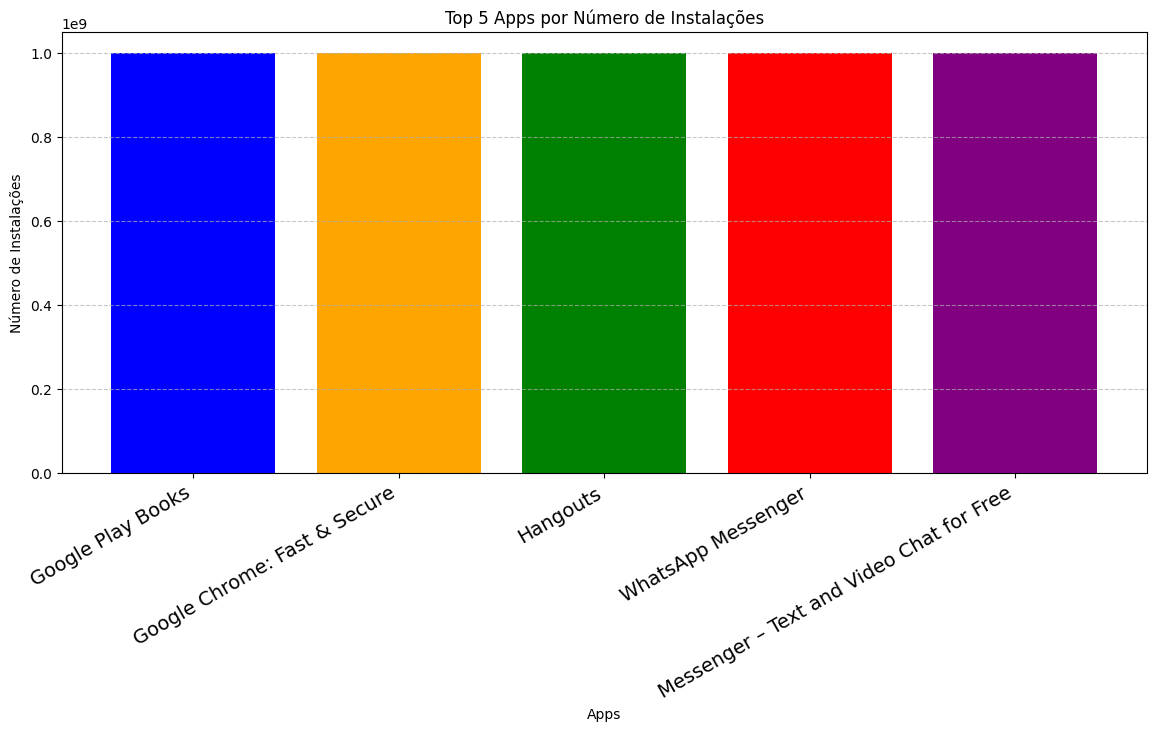

In [5]:
# **Top 5 Apps por Número de Instalações**
top_5_installs = df.nlargest(5, "Installs")
plt.figure(figsize=(14, 7))  # Aumentando levemente o tamanho da figura
plt.bar(top_5_installs["App"], top_5_installs["Installs"], color=['blue', 'orange', 'green', 'red', 'purple'])

# Ajustando os rótulos para melhor exibição mesmo em janelas menores
plt.xlabel("Apps")
plt.ylabel("Número de Instalações")
plt.title("Top 5 Apps por Número de Instalações")

# Rotação de 30° para melhor ajuste e aumento da fonte
plt.xticks(rotation=30, ha='right', fontsize=14)

# Adicionando um padding extra no bottom para evitar corte dos nomes em janelas menores
plt.subplots_adjust(bottom=0.25)

# Adicionando grid discreto para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico atualizado
plt.show()

### Distribuição de Apps por Categoria - Gráfico de Pizza

O código abaixo **gera um gráfico de pizza para visualizar a distribuição de categorias de aplicativos**.

- **Conta a frequência de cada categoria** utilizando `.value_counts()`.
- **Exibe até 12 categorias mais frequentes**, agrupando as restantes como `"Outras"` caso existam.
- **Define uma paleta de cores diversificada (`plt.cm.get_cmap()`)** para evitar repetições visuais.
- **Cria um gráfico de pizza (`plt.pie()`)**, incluindo:
- **Rótulos das categorias** diretamente no gráfico.
- **Percentual de cada categoria** com `autopct='%1.1f%%'`.
- **Ajuste do ângulo inicial (`startangle=140`)** para melhor visualização.
- **Mantém o gráfico circular (`plt.axis("equal")`)** e ajusta rótulos para evitar sobreposição.

C:\Users\Vini\AppData\Local\Temp\ipykernel_36756\2271235882.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20c", len(top_categories)).colors


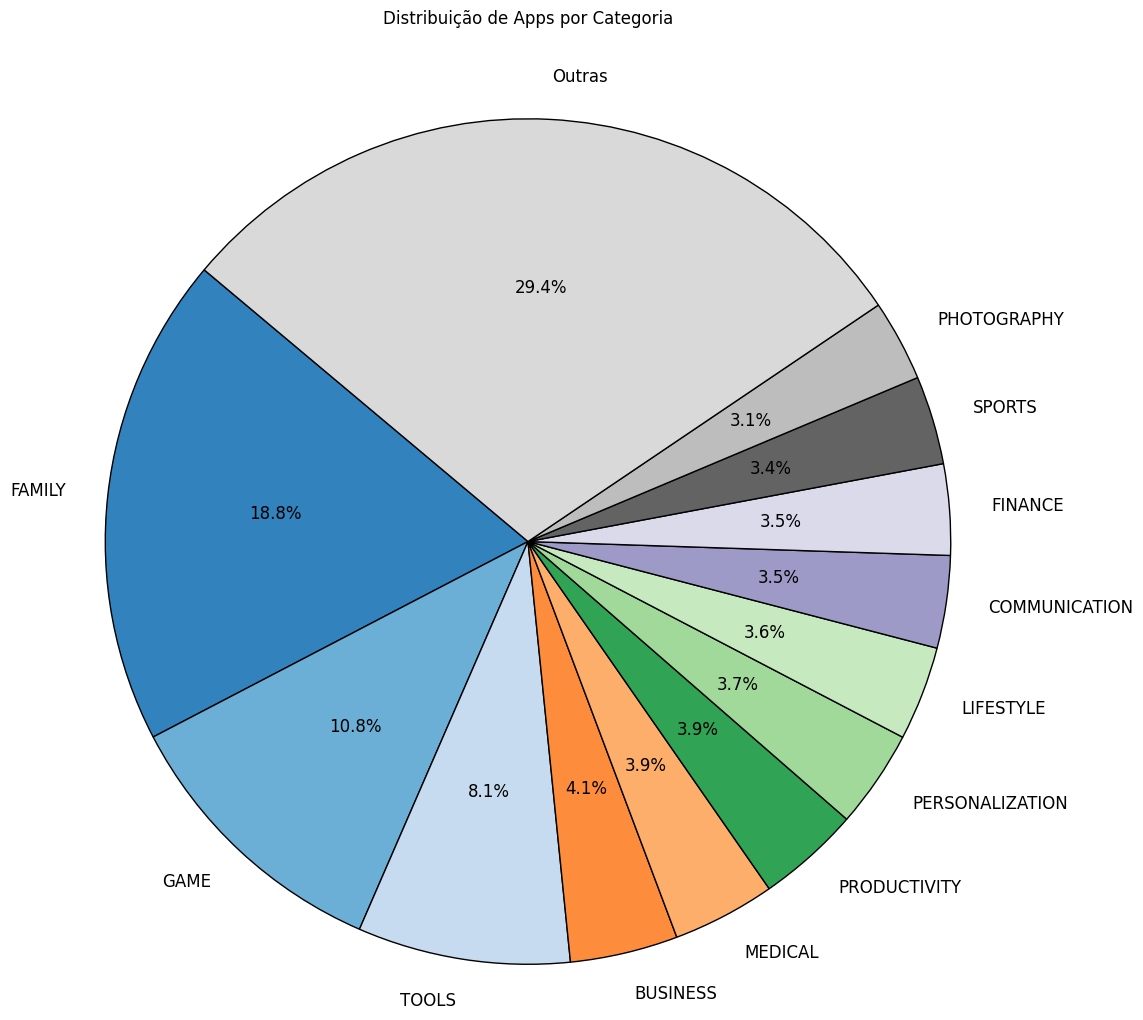

In [6]:
# Gráfico de pizza
# Criando a contagem de categorias corretamente antes de usá-la
category_counts = df["Category"].value_counts()

# Definição do limite de categorias antes de agrupar como "Outras"
num_top_categories = 12  # Mostra até 12 categorias antes de agrupar as menores

# Seleciona as categorias mais frequentes
top_categories = category_counts[:num_top_categories]
others_sum = category_counts[num_top_categories:].sum()

# Adiciona a categoria "Outras" apenas se houver categorias restantes
if others_sum > 0:
    top_categories["Outras"] = others_sum

# Definição de cores diversificadas para evitar repetições
colors = plt.cm.get_cmap("tab20c", len(top_categories)).colors

# Criando o gráfico de pizza ajustado
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(
    top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140,
    colors=colors, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12}
)

# Ajusta a posição dos rótulos para evitar sobreposição
for text in texts:
    text.set_fontsize(12)

# Título impessoal e bem posicionado
plt.title("Distribuição de Apps por Categoria", pad=40)

plt.axis("equal")  # Mantém o gráfico circular
plt.show()

### Identificação do App Mais Caro e Contagem de Apps 'Mature 17+'

O código abaixo **identifica o app mais caro e conta quantos apps possuem classificação 'Mature 17+'**.

- **Localiza o app mais caro** utilizando `idxmax()`, que retorna o índice do maior valor na coluna `"Price"`.
- **Exibe o nome e o preço do app mais caro** com `print()`.
- **Filtra os apps com `"Content Rating" == 'Mature 17+'`** e conta a quantidade total com `.shape[0]`.
- **Exibe a quantidade de apps 'Mature 17+'** no console.

In [7]:
# **App mais caro**
most_expensive_app = df.loc[df["Price"].idxmax()]
print(f"O app mais caro é '{most_expensive_app['App']}' custando ${most_expensive_app['Price']}")

# **Número de apps 'Mature 17+'**
mature_count = df[df["Content Rating"] == "Mature 17+"].shape[0]
print(f"Número de apps classificados como 'Mature 17+': {mature_count}")

O app mais caro é 'I'm Rich - Trump Edition' custando $400.0
Número de apps classificados como 'Mature 17+': 447


### Top 10 Apps por Número de Reviews  

O código abaixo **seleciona os 10 aplicativos distintos com mais avaliações e gera um gráfico de barras**.  

- **Ordena os apps por número de reviews (`sort_values(by="Reviews", ascending=False)`)**.  
- **Garante que os apps sejam únicos (`drop_duplicates(subset=["App"])`)**, evitando repetições na seleção.  
- **Pega os 10 primeiros apps únicos (`head(10)`)**.  
- **Cria um gráfico de barras (`plt.bar()`)**, onde:  
- O eixo X exibe os nomes dos aplicativos.  
- O eixo Y mostra a quantidade de reviews.  
- **Melhora a visualização**:  
- Rótulos do eixo X rotacionados para evitar sobreposição (`plt.xticks(rotation=30)`).  
- Grid discreto para facilitar a leitura (`plt.grid()`).  
- Ajuste no espaçamento inferior para evitar cortes (`plt.subplots_adjust(bottom=0.25)`). 


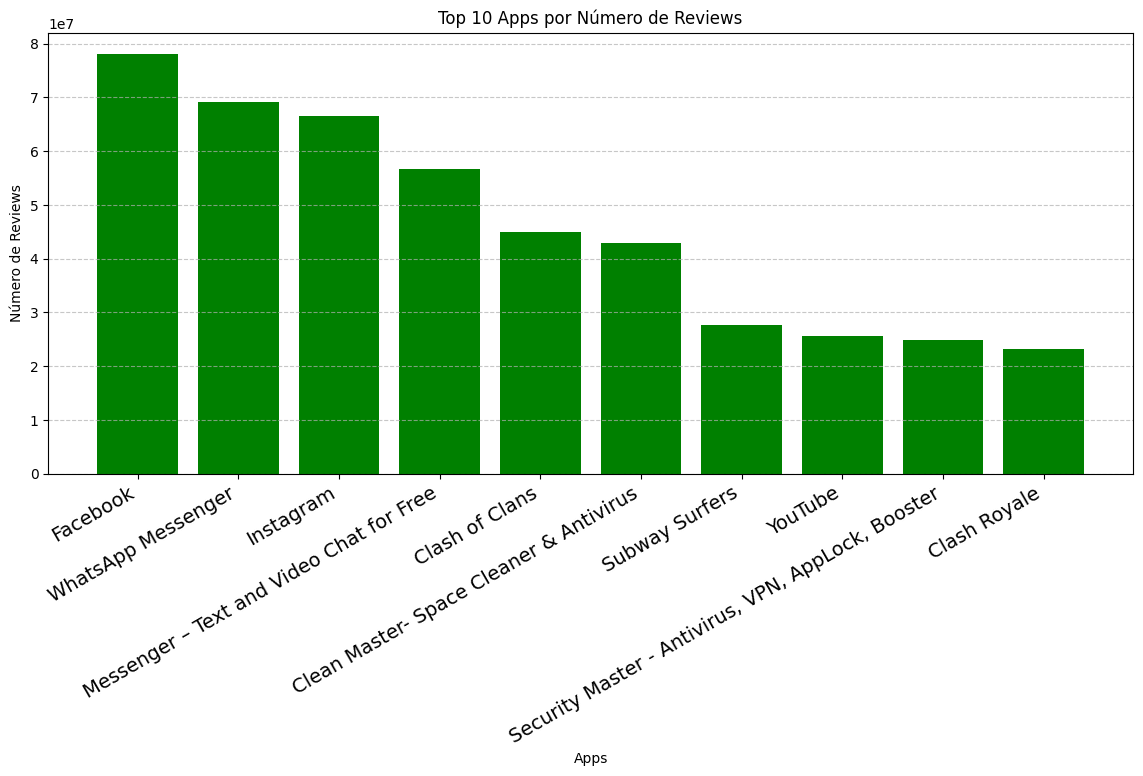

In [8]:
# Selecionar os 10 apps distintos com mais reviews
top_10_reviews = df.sort_values(by="Reviews", ascending=False).drop_duplicates(subset=["App"]).head(10)

# Criar gráfico de barras
plt.figure(figsize=(14, 7))
plt.bar(top_10_reviews["App"], top_10_reviews["Reviews"], color='green')

# Ajustar rótulos e título
plt.xlabel("Apps")
plt.ylabel("Número de Reviews")
plt.title("Top 10 Apps por Número de Reviews")

# Melhorar a visibilidade dos rótulos no eixo X
plt.xticks(rotation=30, ha='right', fontsize=14)

# Ajustar espaçamento inferior para evitar corte dos rótulos
plt.subplots_adjust(bottom=0.25)

# Adicionar grid discreto para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

### Cálculo Adicional 1: Média de Instalações por Categoria  

O código abaixo **calcula e exibe a média de instalações por categoria de aplicativo**.  

- **Agrupa os dados por `"Category"`** e calcula a média de `"Installs"`.  
- **Ordena as categorias pela média de instalações** em ordem decrescente.  
- **Seleciona as 10 categorias com maior média de instalações** e cria um gráfico de barras.  
- **Ajusta os rótulos do gráfico**, incluindo título, legendas e rotação para melhor visualização.  
- **Adiciona um grid discreto (`plt.grid()`)** para facilitar a leitura dos valores.

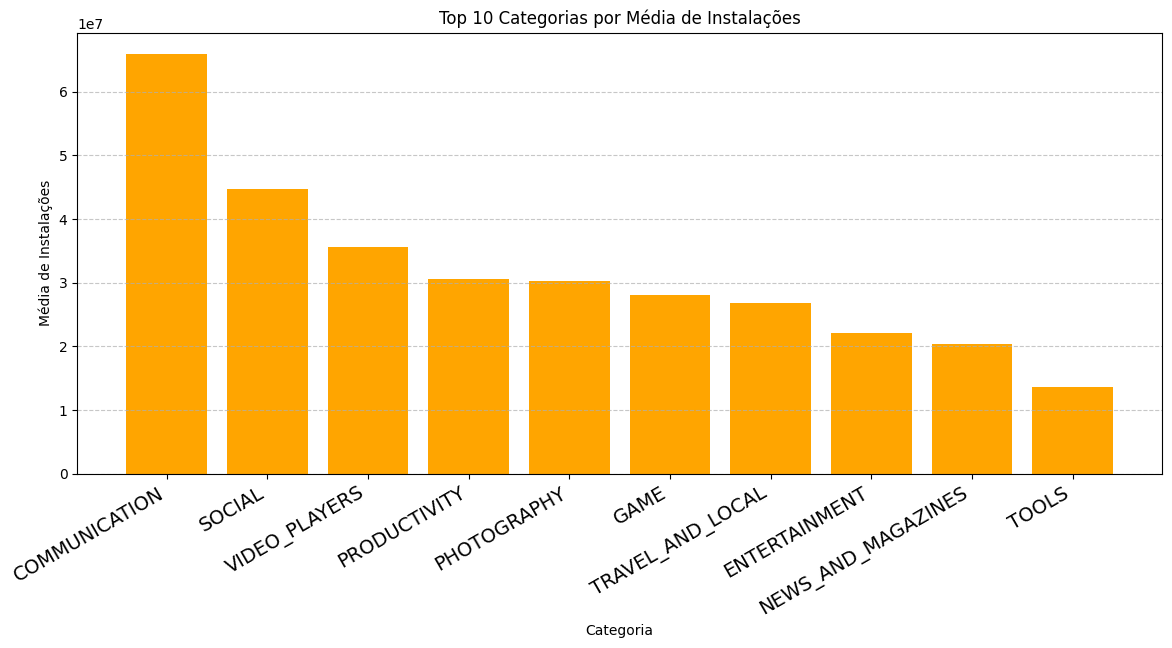

In [9]:
# **Cálculo Adicional 1: Média de Instalações por Categoria**
mean_installs_by_category = df.groupby("Category")["Installs"].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 7))  # Ajuste do tamanho da figura
plt.bar(mean_installs_by_category.index[:10], mean_installs_by_category.values[:10], color='orange')

# Ajustando rótulos para melhor visibilidade
plt.xlabel("Categoria")
plt.ylabel("Média de Instalações")
plt.title("Top 10 Categorias por Média de Instalações")

# Rotação dos rótulos do eixo X para evitar cortes e sobreposição
plt.xticks(rotation=30, ha='right', fontsize=14)

# Adicionando padding extra no bottom para evitar corte dos nomes
plt.subplots_adjust(bottom=0.25)

# Adicionando grid discreto
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Cálculo Adicional 2: Distribuição de Preços dos Apps Pagos  

O código abaixo **gera um histograma da distribuição de preços dos aplicativos pagos**.  

- **Filtra apenas apps pagos (`Price` > 0)** para análise.  
- **Cria um histograma (`plt.hist()`)**, agrupando os preços em **20 intervalos (`bins=20`)**.  
- **Define cor azul (`color='blue'`)**, com transparência (`alpha=0.7`) e bordas pretas (`edgecolor='black'`).  
- **Ajusta os rótulos e título** para melhor entendimento do gráfico.  
- **Adiciona um grid discreto (`plt.grid()`)** para facilitar a leitura.  

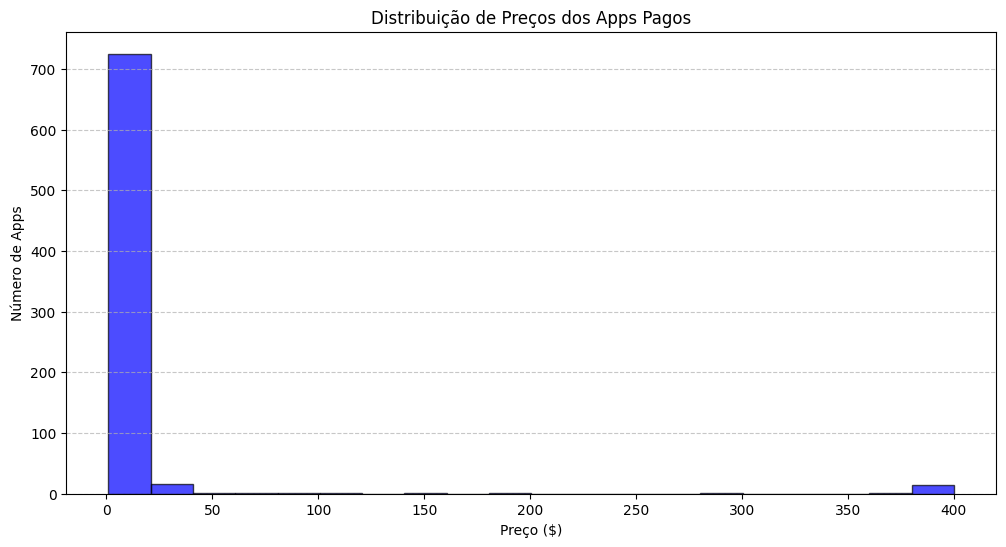

In [10]:
 # **Cálculo Adicional 2: Distribuição de Preços dos Apps Pagos**
paid_apps = df[df["Price"] > 0]
plt.figure(figsize=(12, 6))
plt.hist(paid_apps["Price"], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Preço ($)")
plt.ylabel("Número de Apps")
plt.title("Distribuição de Preços dos Apps Pagos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()